In [16]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import random

# load the data
iris  = load_iris()

# take the data
data_x = iris.data[::]
data_y = iris.target[::]

# print trainset & testset indexs
D_bar = [];
D = list(range(0, len(data_x)))
for index in range(0,len(data_x)):
    value = random.randint(0, len(data_x))
    D_bar.append(value) # D'
    D.append(value) # D

testset_index = list(set(D) - set(D_bar)) # D-D'
trainset_index = list(set(D_bar)) # D'

print("Trainset index : \n" + str(trainset_index) + "\n")
print("Testset index : \n" + str(testset_index))

# train set
train_data = [ data_x[index] for index in trainset_index ]
train_target = [ data_y[index] for index in trainset_index ]

# test set
test_data = [ data_x[index] for index in testset_index ]
test_target = [ data_y[index] for index in testset_index ]


Trainset index : 
[0, 2, 4, 5, 6, 7, 9, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 44, 46, 48, 50, 52, 54, 55, 56, 58, 59, 60, 63, 64, 66, 67, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 85, 86, 88, 89, 90, 92, 93, 94, 95, 97, 100, 101, 103, 105, 106, 107, 108, 109, 110, 111, 114, 115, 116, 117, 118, 119, 121, 122, 124, 126, 129, 132, 133, 134, 135, 138, 140, 141, 142, 143, 147, 148, 149]

Testset index : 
[128, 1, 130, 3, 131, 8, 136, 10, 137, 139, 14, 16, 17, 144, 145, 20, 146, 29, 36, 38, 42, 43, 45, 47, 49, 51, 53, 57, 61, 62, 65, 69, 72, 80, 82, 83, 84, 87, 91, 96, 98, 99, 102, 104, 112, 113, 120, 123, 125, 127]


Accurancy rate testset : 0.96
Accurancy rate trainset : 0.98

Confusion Matrix testset: 
 [[16  0  0]
 [ 0 15  2]
 [ 0  0 17]]
Confusion Matrix trainset: 
 [[34  0  0]
 [ 0 31  2]
 [ 0  0 33]]
Reshaped confusion matrix testset : 
[16  0  0  0 15  2  0  0 17]
Reshaped confusion matrix trainset : 
[34  0  0  0 31  2  0  0 33]

P_trainset: 0.98 R_trainset: 0.98 F1_trainset: 0.98
P_testset: 0.96 R_testset: 0.96 F1_testset: 0.96

trainset probability : 
[ 0.13300142  0.15468495  0.11651412  0.09205084  0.11927135  0.14767309
  0.20094512  0.14473606  0.20727304  0.16733429  0.05289774  0.12068683
  0.0934568   0.09715583  0.0896262   0.15020202  0.16210653  0.2195802
  0.13495034  0.14143637  0.15095369  0.19261888  0.14552162  0.07999122
  0.07058525  0.20094512  0.1623439   0.20094512  0.15175176  0.11679545
  0.29711752  0.10135128  0.10403872  0.11881964  0.81326964  0.70576448
  0.66094641  0.53829594  0.52861717  0.77249553  0.50300905  0.70363023
  0.55801402  0.66424662  0.41754388 

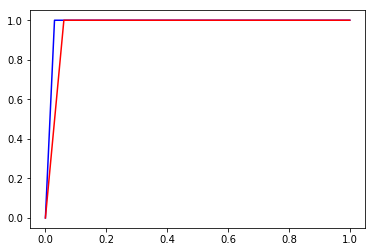

In [17]:
# SGDClassifier & SVC & LogisticRegresion

#clf = linear_model.SGDClassifier()
#clf = svm.SVC(kernel='linear',gamma=0.001,C=100)
clf = linear_model.LogisticRegression()
clf.fit(train_data,train_target)

# print accurancy rate
accurancy_rate_testset = accuracy_score(test_target, clf.predict(test_data))
accurancy_rate_trainset = accuracy_score(train_target, clf.predict(train_data))

print("Accurancy rate testset : " + str(accurancy_rate_testset))
print("Accurancy rate trainset : " + str(accurancy_rate_trainset) + "\n")

# print confusion matrix
confusion_train = confusion_matrix(train_target, clf.predict(train_data))
confusion_test = confusion_matrix(test_target, clf.predict(test_data))

print("Confusion Matrix testset: \n " + str(confusion_test))
print("Confusion Matrix trainset: \n " + str(confusion_train))
print("Reshaped confusion matrix testset : \n" + str(np.reshape(confusion_test, 9)))
print("Reshaped confusion matrix trainset : \n" + str(np.reshape(confusion_train, 9)) + "\n")

# print P, R, F1
P_train = metrics.precision_score(train_target, clf.predict(train_data),average='micro')
R_train = metrics.recall_score(train_target, clf.predict(train_data),average='micro')
F1_train = metrics.f1_score(train_target,clf.predict(train_data),average='micro')

P_test = metrics.precision_score(test_target, clf.predict(test_data),average='micro')
R_test = metrics.recall_score(test_target, clf.predict(test_data),average='micro')
F1_test = metrics.f1_score(test_target,clf.predict(test_data),average='micro')

print("P_trainset: "+ str(P_train) + " R_trainset: " + str(R_train) + " F1_trainset: " + str(F1_train))
print("P_testset: "+ str(P_test) + " R_testset: " + str(R_test) + " F1_testset: " + str(F1_test) + "\n")

# print each prediction's probability
predict_proba_train = clf.predict_proba(train_data)[:,1]
predict_proba_test = clf.predict_proba(test_data)[:,1]

print("trainset probability : \n" + str(predict_proba_train))
print("testset probability : \n" + str(predict_proba_test) + "\n")

# calculate AUC
fpr_test, tpr_test, threshhold_test = metrics.roc_curve(test_target, clf.predict(test_data),pos_label=2)
fpr_train, tpr_train, threshhold_train = metrics.roc_curve(train_target, clf.predict(train_data),pos_label=2)
auc_test = metrics.auc(fpr_test,tpr_test)
auc_train = metrics.auc(fpr_train,tpr_train)

print("AUC testset : " + str(auc_test))
print("AUC trainset : " + str(auc_train))

# draw ROC
plt.plot(fpr_train,tpr_train,color='blue')
plt.plot(fpr_test,tpr_test,color ='red')
